In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
path_to_results = '/home/ng213/pazy_code/pazy-aepw3-results/03_StaticAeroelastic/'

In [30]:
results = {}
alpha = np.array([5, 7])

results['sharpy_w_skin'] = {'filename': 'sharpy_w_skin',
                            'skin': True,
                            'label': 'SHARPy',
                            'line_format': {'ls': '--', 
                                          'marker': 'o',
                                          'mfc': 'none', 'markevery':2}}
results['sharpy_wo_skin'] = {'filename': 'sharpy_wo_skin',
                            'skin': False,
                          'label': 'SHARPy',
                           'line_format': {'ls': '--',
                                          'marker': 'o',
                                          'mfc': 'none'}}

results['mrm_wo_skin'] = {'filename': 'technion_mrm_wo_skin',
                            'skin': False,
                          'label': 'MRM',
                           'line_format': {'ls': '-',
                                           'marker': '^',
                                          'mfc': 'none'}}



results['mrm_w_skin'] = {'filename': 'technion_mrm_w_skin',
                            'skin': True,
                          'label': 'MRM',
                           'line_format': {'ls': '-',
                                           'marker': '^',
                                          'mfc': 'none'}}



results['technion_experimental'] = {'filename': 'technion_experimental',
                            'skin': True,
                          'label': 'Experimental',
                           'line_format': {'ls': 'none'}}

In [31]:
for case in results.values():
    case['data'] = []
    for aoa in alpha:
        case['data'].append(np.loadtxt(path_to_results + case['filename'] + '_alpha{:04g}.txt'.format(aoa * 100)))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


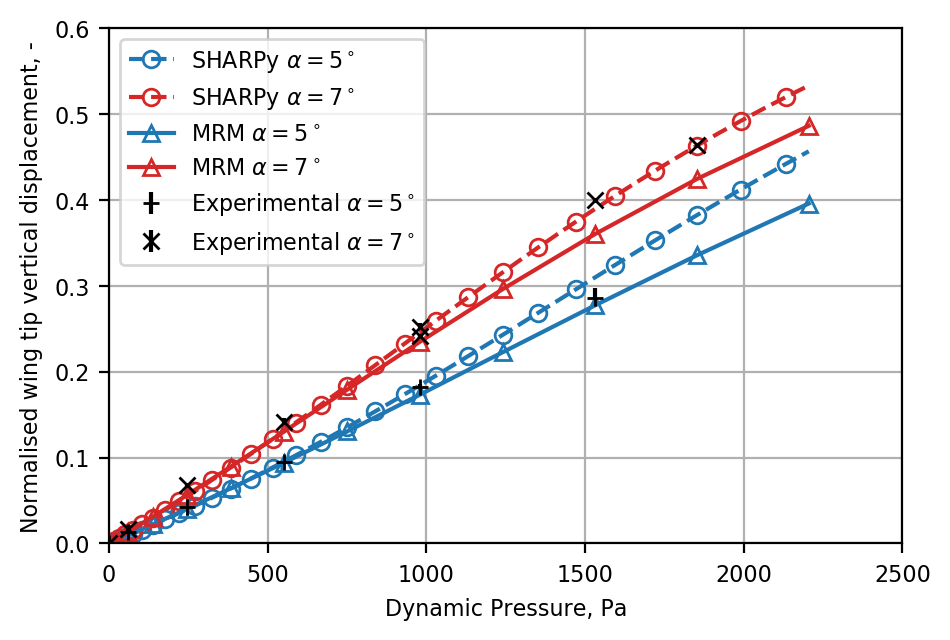

In [34]:
cm2in = 1/2.54
ar = 1.5
width_cm = 13

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(figsize=figsize)

color_list = ['tab:blue', 'tab:red']
marker_list = ['+', 'x']

for key, case in results.items():
    if case['skin']:
        a = ax
    else:
        continue 
    
    for i_alpha in range(len(alpha)):
        if key == 'technion_experimental':
            a.errorbar(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1] / 0.55, yerr=case['data'][i_alpha][:, 2]/ 0.55, fmt=marker_list[i_alpha], color='k',
                      label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),)
        else:
            a.plot(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1]/ 0.55, 
                   color=color_list[i_alpha],
                   label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),
                   **case.get('line_format', {}))

ax.legend(fontsize=8)
ax.set_ylim(0, 0.6)
ax.set_xlim(0, 2500)
ax.set_xlabel('Dynamic Pressure, Pa')
ax.set_ylabel('Normalised wing tip vertical displacement, -')
ax.grid()

for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

plt.savefig('../figures/03_StaticAeroelastic.eps')